In [1]:
import pandas as pd #package for reading data
import numpy as np 
import matplotlib.pyplot as plt #package for creating plots

Import data into the notebook

In [2]:
data_folder = "data/"
prices = pd.read_csv(data_folder + "clean_prices.csv")
print(prices.columns)

Index(['platform', 'website', 'date', 'zipcode', 'rank', 'page', 'query',
       'prod_id', 'upc', 'product', 'manufacturer', 'model', 'price',
       'list_price', 'in_stock', 'max_qty', 'seller', 'arrives', 'shipping',
       'shipping_price', 'shipping_options', 'store_stock', 'store_address',
       'store_zip', 'store_price', 'weight', 'reviews', 'rating', 'quantity1',
       'quantity2', 'quantity3', 'quantity4', 'quantity5', 'ads', 'calc_rank',
       'calc_inven', 'calc_promo', 'calc_ship'],
      dtype='object')


Are promotions correlated with the rankings and inventory? Create a scatter plot with the two variables.

In [3]:
# correlation
print( round(prices['calc_rank'].corr(prices['calc_promo']), 4))
print(round(prices['calc_inven'].corr(prices['calc_promo']), 4))

-0.202
0.0842


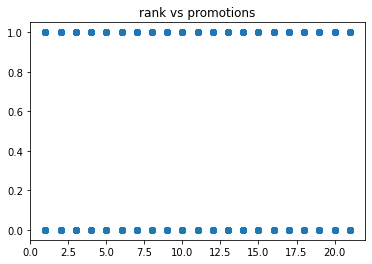

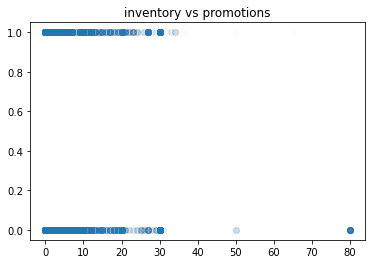

In [4]:
# scatterplot
plt.title("rank vs promotions")
plt.scatter(prices['calc_rank'], prices['calc_promo'],alpha=.01)
plt.show()
plt.title("inventory vs promotions")
plt.scatter(prices['calc_inven'], prices['calc_promo'],alpha=.01)
plt.show()

How do average prices differ between products that are sponsored/advertised in the search results versus products that are not. i.e. report the average price for products that are advertised against those that are not.

In [5]:
avg_price = pd.DataFrame(prices.groupby('calc_promo')['price'].mean())
avg_price

,price
calc_promo,
0.0,152.707214
1.0,117.691904


If a product stops being sponsored, does the price change?

In [6]:
prices['label'] = prices['manufacturer'].astype(str) + " " + prices['model']
price_promo = prices.groupby('label')['calc_promo'].mean()
price_promo = price_promo[price_promo >0].index
promo_select = np.zeros(len(prices),dtype=bool)
for label in price_promo:
    promo_select =  (prices['label']==label) | promo_select
prices_promo = prices[promo_select]

In [7]:
avg_price_promo = pd.DataFrame(prices_promo.groupby('calc_promo')['price'].mean())
avg_price_promo

,price
calc_promo,
0.0,144.076747
1.0,118.378170
